# Equipe dos Magos
- Componentes
    1. João Kruschewsky
    2. João Freitas
    3. Vito Magarão
    4. Vinícius Matos

- Atividade:
    
    O dataset que trabalharemos nesta atividade nos fornece dados de passageiros do Titanic, incluindo se eles sobreviveram ou não ao naufrágio. O desafio original do Kaggle propõe que seja criado um classificador capaz de identificar se um passageiro sobreviveu ou não ao desastre. Faremos isso, mas não agora.

    Considerem que ocorreu um desastre onde um bom número de pessoas morreu, mas outras sobreviveram. A principal pergunta que nos surge é: quais fatores foram determinantes para que alguns sobrevivessem e outros não?
    Vamos tentar responder essa pergunta por meio de uma tarefa de análise descritiva dos dados. Como vocês verão ao explorar o dataset, existe bastante trabalho de pré-processamento a ser realizado, contudo, lembrem-se que o objetivo aqui é que este tratamento dos dados busque auxiliar vocês analistas a identificarem padrões nos dados e não traduzi-los para que um algoritmo de aprendizado o faça.

    Ao final do código, incluam um resumo das informações relevantes encontradas.
    Minha sugestão é que vocês explorem ao máximo o dataset, entendam os atributos, como eles se relacionam com o target, mas não só com ele. Assim, vocês conseguirão identificar melhores estratégias de pré-processamento que virão a favorecer a qualidade da análise.

    Basta uma entrega por equipe, mas e imprescidível que vocês informem o nome dos integrantes da equipe.

- Links
    
    1. [Colab.ipnb](https://colab.research.google.com/drive/1MLOdFzWzBC-yB5w2L8-CVAra6RDzbcdf?authuser=1#scrollTo=xkv6Td-I4P6M)
    2. [Dataset](https://drive.google.com/file/d/1m-1Mepa2O2kn-FpzEPTVwADmVc40utSO/view?usp=drive_web&authuser=1)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport # Profile will be discontinued on MAR 1st
from sklearn.base import BaseEstimator, TransformerMixin
from ipywidgets import widgets, interact, Dropdown
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


In [2]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip # Implementação do pandas profiling no colab. Deixar comentado após rodar uma vez

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MasterExecuson/Data-Science-Analytics/main/Pre-processing/titanic/dataset/titanic_train.csv')
df_test = pd.read_csv(r'https://raw.githubusercontent.com/MasterExecuson/Data-Science-Analytics/main/Pre-processing/titanic/dataset/test.csv')

# Filtros

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
def columnCointainsString(series,string):
    return series.str.contains(string)

def isMale(series):
    return series=='male'

# Primeira Análise

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#profile = ProfileReport(df, title="Pandas Profilling Report", html={"style":{"full_width": True}})


In [10]:
# profile

## Unique das colunas do dataset

In [11]:
[[column,df[column].unique()] for column in df.columns ]

[['PassengerId',
  array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
          27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
          40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
          53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
          66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
          79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
          92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
         105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
         118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
         131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
         144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
         157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
         170, 171, 17

Nota-se que existe uma cabine escrita como T. Como não há nível T no Titanic, esse dado precisará ser investigado.

In [12]:
df[df['Cabin']=='T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


In [13]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Por se tratar de apenas uma linha, este dado parece ser um erro, logo será substituido por NA.

In [14]:
df.loc[df[df['Cabin']=='T'].index,'Cabin'] = np.nan

## Ajuste do tipo das variáveis

In [15]:
df["Sex"] = df["Sex"].astype("category")
df["Embarked"] = df["Embarked"].astype("category")
df["Pclass"] = df["Pclass"].astype("float")
df["Survived"] = df["Survived"].astype("bool")

In [16]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          688
Embarked         2
dtype: int64

## Análise

### Análise Univariada

#### Descrição das variáveis

In [17]:
def desbribeColumn (df,col_index,unique=False):
    col_name = str(df.columns[col_index])
    print('Coluna ' + col_name + ": \n")
    print('Número de entradas nulas: ' + str(df[col_name].isna().sum()) )
    print( '\n\nDados estatísticos: \n')
    print(df[col_name].describe())
    if(unique):
        print( '\n\nValores de Entradas unicos: ')
        print( df[col_name].unique())
    else:
        print('\n')
        col_view_grouped = df[col_name].groupby(df[col_name]).count().sort_values(ascending = False)
        print(col_view_grouped)
    return


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    float64 
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        203 non-null    object  
 11  Embarked     889 non-null    category
dtypes: bool(1), category(2), float64(3), int64(3), object(3)
memory usage: 65.6+ KB


#####0. PassengerId

Tipo da variável: O ID de cada passageiro do navio. 

Input esperado: Valor único por coluna, em que cada passageiro tenha seu ID.

Problemas identificados:
* 0 Entradas nulas
* 0 Entradas duplicadas

Por se tratar de um número de identificação, a variável não contribui para a análise da sobrevivência durante o pré-processamento ou construção de modelo.

In [19]:
desbribeColumn(df,0)

Coluna PassengerId: 

Número de entradas nulas: 0


Dados estatísticos: 

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64


PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


##### 1. Pclass

Tipo da variável: Categórica, representando qual a classe da passagem comprada pelo passageiro.

Input esperado: 1 = 1st, 2 = 2nd, 3 = 3rd

Problemas identificados:
* 0 Entradas nulas
* 0 Entradas duplicadas

Dados parecem consistentes e não parecem demandar ações ulteriores. 

In [20]:
desbribeColumn(df, 2)

Coluna Pclass: 

Número de entradas nulas: 0


Dados estatísticos: 

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


Pclass
3.0    491
1.0    216
2.0    184
Name: Pclass, dtype: int64


#####2. Name

Tipo da variável: Nominal, representando o nome do passageiro.

Input esperado: uma entrada única tipo 'OBJECT' para cada linha

Problemas identificados:
* 0 Entradas nulas
* 0 Entradas duplicadas

Essa váriavel, por conter o honorífico do passageiro, pode trazer alguma análise válida sobre a diferença na sobrevivência/mortalidade de crianças e adulto de passageiros do mesmo sexo. 

In [21]:
desbribeColumn(df, 3)

Coluna Name: 

Número de entradas nulas: 0


Dados estatísticos: 

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object


Name
Abbing, Mr. Anthony                        1
Nysveen, Mr. Johan Hansen                  1
Nicholson, Mr. Arthur Ernest               1
Nicola-Yarred, Master. Elias               1
Nicola-Yarred, Miss. Jamila                1
                                          ..
Goodwin, Miss. Lillian Amy                 1
Goodwin, Mr. Charles Edward                1
Goodwin, Mrs. Frederick (Augusta Tyler)    1
Graham, Miss. Margaret Edith               1
van Melkebeke, Mr. Philemon                1
Name: Name, Length: 891, dtype: int64


#####3. Sex

Tipo da variável: Categórica, representando o gênero do passageiro.

Input esperado: classificações de gênero impostas pelo formulário (male/female)

Problemas identificados:
* 0 Entradas nulas
* 0 Entradas duplicadas
* 0 Entradas conflitantes

A coluna em específico não requer tratamento.

In [22]:
desbribeColumn(df,4)

Coluna Sex: 

Número de entradas nulas: 0


Dados estatísticos: 

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


Sex
male      577
female    314
Name: Sex, dtype: int64


#####4. Age

Tipo da variável: Contínua, representando a idade do passageiro na data da viagem.

Input esperado: entradas referentes à idades associadas, decimais numéricas uma para cada passageiro

Problemas identificados:
* 86 Entradas nulas
    * **Qual a estratégia adotada para tratar esses casos?**
    * Substituição pela Moda? 

A Coluna requer atenção para tratamento em alguns pontos: 

* Entradas em formato decimal
    * entradas como 0.92 converteremos para 92 anos?
    * entradas como 36.5 apenas truncaremos/arrendondaremos? 
    * entradas de menores de 18 anos deveriam ser cruzada com a presença de familiares? 

In [23]:
desbribeColumn(df,5)

Coluna Age: 

Número de entradas nulas: 177


Dados estatísticos: 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


Age
24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
         ..
20.50     1
14.50     1
12.00     1
0.92      1
80.00     1
Name: Age, Length: 88, dtype: int64


#####5. SibSp

Tipo da variável: Categórica, representando o número de irmãos e cônjuges à bordo do Titanic

Input esperado: entradas de numeros inteiros, com múltiplas entradas sem valor (0 ou nulo) pois a uma boa parte das pessoas pode ter viajado sem familia, incluindo tripulação. 

Problemas identificados:
* 0 Entradas nulas, porem 283 entradas zeradas. 

A Coluna requer atenção para tratamento em alguns pontos: 

* Como que 8 pessoas supostamente tem irmãos à bordo, mas o numero de ocorrencias refletido não é multiplo de 8? seria um typo?
* Provocação parecida com a entrada de 5 irmãos/conjunes, por que ela so aparece 1x? 


In [24]:
desbribeColumn(df, 6)

Coluna SibSp: 

Número de entradas nulas: 0


Dados estatísticos: 

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


##### 6. Parch

Tipo da variável: Categórica, representando o número de figuras parentais ou filhos à bordo do Titanic

Input esperado: entradas de numeros inteiros, com multiplas entradas sem valor (0 ou nulo) pois a uma boa parte das pessoas pode ter viajado sem familia, incluindo tripulação. 

Problemas identificados:
* 0 Entradas nulas, porem 324 entradas zeradas. 

A Coluna requer atenção para tratamento em alguns pontos: 
* Como é possível haver uma única entrada de uma pessoa com 6 ou 9 conjujes/filhos? 

Parece ter alguma sujeira nessa coluna também, importante avaliar mediante contexto

##### 7. Ticket

Tipo da variável: Categórica, representando a numeração do bilhete do passageiro.

Input esperado: Valores sequenciais que variam a depender do porto em que o passageiro embarcou.

Problemas identificados:
* 0 Entradas nulas

Da mesma forma que 'PassengerId', a variável não contribui para a análise da sobrevivência durante o pré-processamento ou construção de modelo.

In [25]:
desbribeColumn(df, 8)

Coluna Ticket: 

Número de entradas nulas: 0


Dados estatísticos: 

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object


Ticket
1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
345572      1
345364      1
343276      1
343275      1
347464      1
Name: Ticket, Length: 681, dtype: int64


##### 8. Fare

Tipo da variável: Contínua, representando o valor da passagem pago pelo passageiro.

Input esperado: Entradas referentes ao valor das passagens, com decimais. 

Problemas identificados:
* 0 Entradas nulas

A váriavel pode trazer um olhar mais específico sobre a taxa de sobrevivência em relação à classe, visto a diferença de acomodações dentro da mesma classe.

In [26]:
desbribeColumn(df, 9)

Coluna Fare: 

Número de entradas nulas: 0


Dados estatísticos: 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.1125      1
8.1375      1
17.4000     1
8.1583      1
7.7292      1
Name: Fare, Length: 248, dtype: int64


##### 9. Cabin

Tipo da variável: Categórica, representando o nível da cabine do passageiro.

Input esperado: Entradas de strings iniciadas por uma letra classificadora seguida da numeração da cabine.

Problemas identificados:
* 688 Entradas nulas
    * **Qual a estratégia adotada para tratar esses casos?**
    * Uma análise com 'Pclass' e 'Fare' pode ser válida para preencher esses campos?

A Coluna requer atenção para tratamento em alguns pontos: 
* Entradas com dois ou mais números de cabine.
    * Talvez seja necessário derivar as entradas em novas categorias considerando apenas a letra inicial.

Parece ter alguma sujeira nessa coluna também, importante avaliar mediante contexto.


In [27]:
desbribeColumn(df, 10)

Coluna Cabin: 

Número de entradas nulas: 688


Dados estatísticos: 

count     203
unique    146
top        G6
freq        4
Name: Cabin, dtype: object


Cabin
G6             4
B96 B98        4
C23 C25 C27    4
D              3
E101           3
              ..
C101           1
B94            1
B86            1
B82 B84        1
C62 C64        1
Name: Cabin, Length: 146, dtype: int64


##### 10. Embarked

Tipo da variável: Categórica, representando qual o porto em que o passageiro embarcou.

Input esperado: S = Southampton, C = Cherbourg-Octeville, Q = Queenstown

Problemas identificados:
* 2 Entradas nulas

Dados parecem consistentes e, com exceção dos dois registros nulo que precisaram de um pequeno tratamento, não parecem demandar ações ulteriores. 

In [28]:
desbribeColumn(df, 11)

Coluna Embarked: 

Número de entradas nulas: 2


Dados estatísticos: 

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


#### Limpando as variáveis indesejadas

In [29]:
df = df.drop(['PassengerId','Ticket'], axis=1)

#### Análise de variáveis numéricas

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    bool    
 1   Pclass    891 non-null    float64 
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Cabin     203 non-null    object  
 9   Embarked  889 non-null    category
dtypes: bool(1), category(2), float64(3), int64(2), object(2)
memory usage: 51.7+ KB


In [31]:
df1 = df.select_dtypes([np.int, np.float])
numeric_variables_graphs =  {}
plt.figure(figsize=(80, 60), dpi=80)
for i, column in enumerate(df1.columns):
    fig, ax = plt.subplots(1,2,figsize=(18, 6))
    sns.histplot(ax=ax[0],data=df1, x=column).set(title = "Histplot of " + column)
    sns.boxplot(x=df1[column]).set(title = "Boxplot of " + column)
    numeric_variables_graphs[column] = fig

<ipython-input-31-f0c4b434e200>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1 = df.select_dtypes([np.int, np.float])
<ipython-input-31-f0c4b434e200>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1 = df.select_d

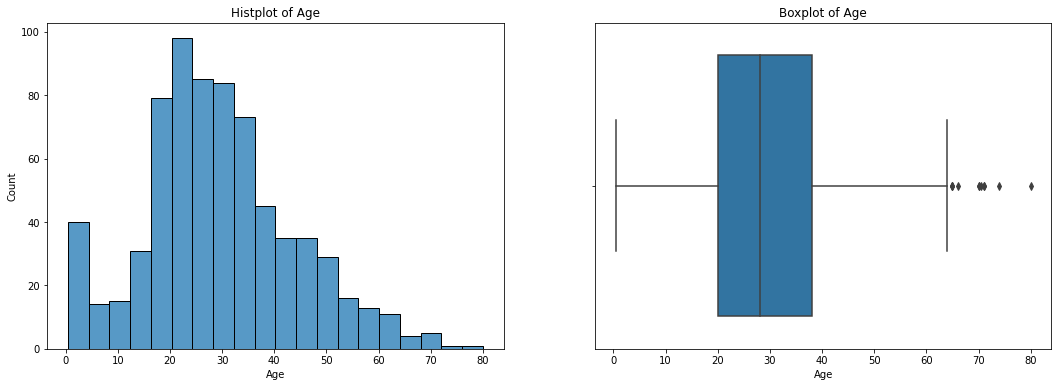

In [32]:
numeric_variables_graphs["Age"]

A variável se comporta como uma distribuição normal, com o pico entre 20 e 30 anos. Isso nos permite usar metodos estatisticos que dependem de uma distribuição normal. Há um desbalanceamento para direita.

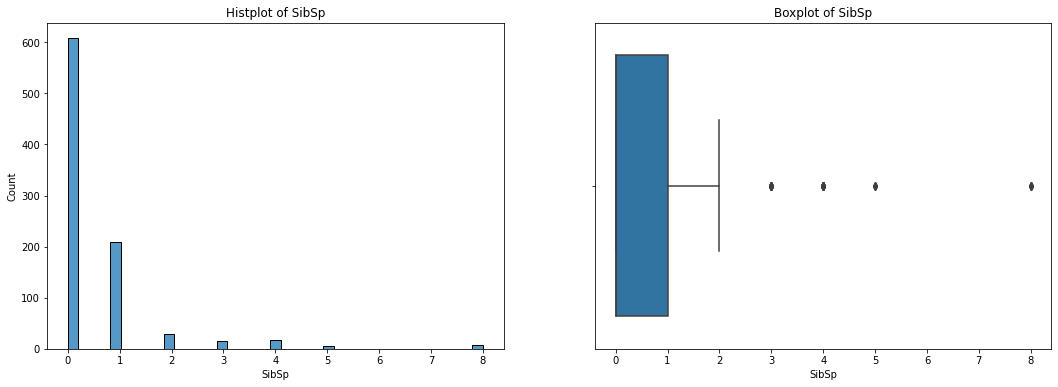

In [33]:
numeric_variables_graphs["SibSp"]

A variável não segue uma distribuição normal, conta com a presença de alguns outliers que a principio não parecem ser dados falsos, apenas um desvio do padrão.

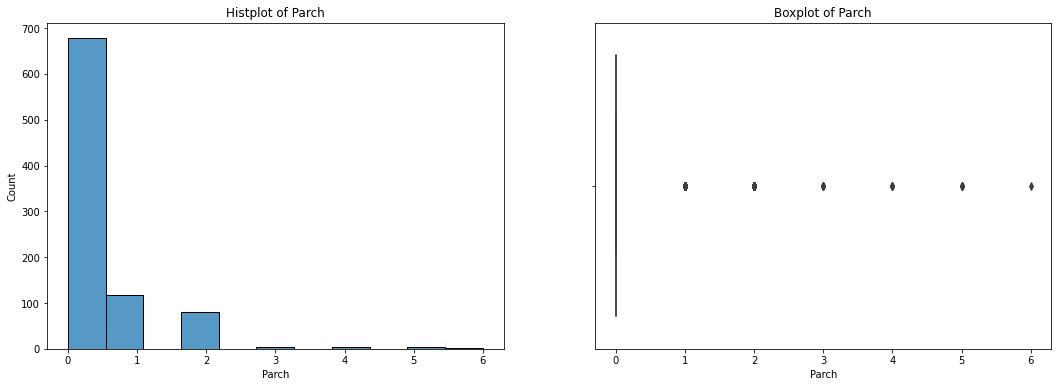

In [34]:
numeric_variables_graphs["Parch"]

A maioria dos tripulantes possuem pais ou fihos igual a 0, o que pode indicar valores não informados e sendo preenchidos com 0, talvez possa ser criada um atribuito binario para identificação de presença ou não de pai ou filho.

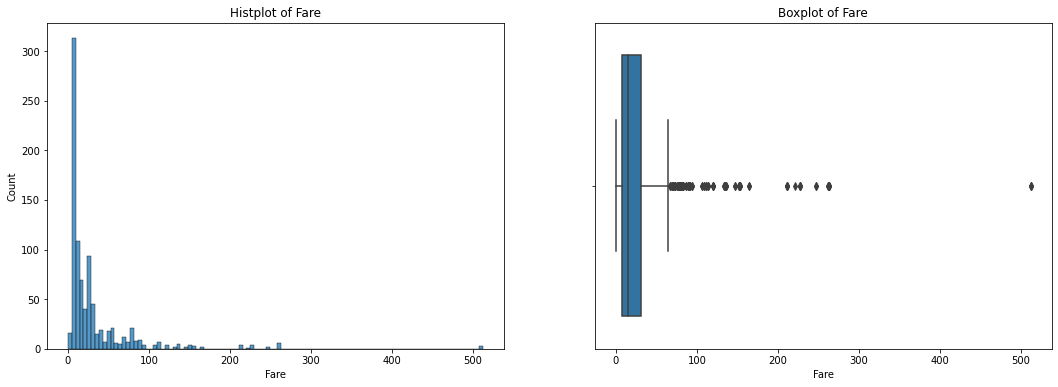

In [35]:
numeric_variables_graphs["Fare"]

Há uma pequena porcentagem de pessoas que não pagaram a passagem, acreditamos que sejam funcionários do navio ou crianças. Há muitos outliers mas ainda não é possivel inferir se são valores falsos, é preciso entender a lógica do pagamento. 

#### Análise de variáveis contínuas

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    bool    
 1   Pclass    891 non-null    float64 
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Cabin     203 non-null    object  
 9   Embarked  889 non-null    category
dtypes: bool(1), category(2), float64(3), int64(2), object(2)
memory usage: 51.7+ KB


In [37]:
(df.Pclass.value_counts()/len(df)*100).to_frame()

,Pclass
3.0,55.106622
1.0,24.242424
2.0,20.650954


A maior parte das pessoas estão concentradas no grupo 3 que representa a classe econômica mais baixa.

In [38]:
(df.Sex.value_counts()/len(df)*100).to_frame()

,Sex
male,64.758698
female,35.241302


Há um desbalanceamento significativo para homens no dataset

In [39]:
(df.Embarked.value_counts()/len(df)*100).to_frame()

,Embarked
S,72.278339
C,18.855219
Q,8.641975


Este atributo permite visualizar que a quantidade de embarques foi decrescendo ao longo do trajeto.

### Análise Multivariada

Como o foco de nossa análise é identificar padrões com o target (coluna survived), a análise multivariada será muito mais focada nessa variável específica.

In [40]:
df1 = df.select_dtypes([np.int, np.float])
columns = df1.columns
df1["Survived"] = df["Survived"].astype("category")
numeric_variables_graphs_per_survived =  {}
plt.figure(figsize=(80, 60), dpi=80)
for i, column in enumerate(columns):
    fig, ax = plt.subplots(1,2,figsize=(18, 6))
    sns.histplot(ax=ax[0],data=df1, x=column, hue='Survived',hue_order=[True,False],shrink=.8,multiple="dodge",bins=30,color='red',kde=True).set(title = "Histplot of " + column)
    sns.boxplot(data=df1,x=column, y='Survived',hue='Survived',hue_order=[True,False])  
    numeric_variables_graphs_per_survived[column] = fig

<ipython-input-40-7f881a49a1f9>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1 = df.select_dtypes([np.int, np.float])
<ipython-input-40-7f881a49a1f9>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1 = df.select_d

In [41]:
df1 = df.select_dtypes(['category'])
columns = df1.columns
df1["Survived"] = df["Survived"].astype("category")
category_variables_graphs_per_survived =  {}
plt.figure(figsize=(80, 60), dpi=80)
for i, column in enumerate(columns):
    fig, ax = plt.subplots(1,1,figsize=(9, 6))
    sns.histplot(data=df1, x=column, hue='Survived',hue_order=[True,False],shrink=.8,multiple="dodge",bins=30,color='red',kde=True).set(title = "Histplot of " + column)
    category_variables_graphs_per_survived[column] = fig

<ipython-input-41-9c20778c1ed1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Survived"] = df["Survived"].astype("category")


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    bool    
 1   Pclass    891 non-null    float64 
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Cabin     203 non-null    object  
 9   Embarked  889 non-null    category
dtypes: bool(1), category(2), float64(3), int64(2), object(2)
memory usage: 51.7+ KB


In [43]:
df1 = df.select_dtypes(['category'])
columns = df1.columns
df1["Survived"] = df["Survived"].astype("category")
category_variables_tables_per_survived =  {}
plt.figure(figsize=(80, 60), dpi=80)
for i, column in enumerate(columns):
    grouped = df.groupby([column])['Survived'].value_counts()
    percentages = (grouped / grouped.groupby(level=0).sum()) * 100
    category_variables_tables_per_survived[column] = percentages.to_frame()

<ipython-input-43-3a14f9fd4493>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Survived"] = df["Survived"].astype("category")


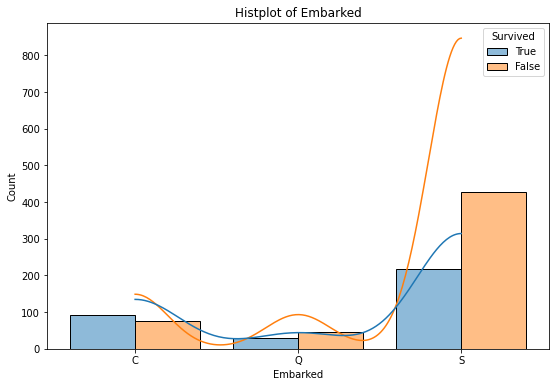

In [44]:
category_variables_graphs_per_survived['Embarked']

In [45]:
category_variables_tables_per_survived['Embarked']

Survived
Embarked Survived           
C        True      55.357143
         False     44.642857
Q        False     61.038961
         True      38.961039
S        False     66.304348
         True      33.695652

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    bool    
 1   Pclass    891 non-null    float64 
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Cabin     203 non-null    object  
 9   Embarked  889 non-null    category
dtypes: bool(1), category(2), float64(3), int64(2), object(2)
memory usage: 51.7+ KB


## Tratamento de dados faltantes

Foi identificado dentro da variavel name o termo "master", que permite estimar a idade da criança entre 10 e 13 anos.

In [47]:
df[(df['Age'].isna())&(isMale(df['Sex']))&( columnCointainsString(df['Name'],"Master"))]

#precisamos identificas os master que tem menos de 13 anos dentro das idades vazias.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
65,True,3.0,"Moubarek, Master. Gerios",male,NaN,1,1,15.2458,NaN,C
159,False,3.0,"Sage, Master. Thomas Henry",male,NaN,8,2,69.5500,NaN,S
176,False,3.0,"Lefebre, Master. Henry Forbes",male,NaN,3,1,25.4667,NaN,S
709,True,3.0,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,15.2458,NaN,C


In [48]:
df[ (columnCointainsString(df['Name'],"Master"))&(isMale(df['Sex']))&(df['Age'].notna())][['Age']].describe()
#Verificando moda e média

,Age
count,36.000000
mean,4.574167
std,3.619872
min,0.420000
25%,1.000000
50%,3.500000
75%,8.000000
max,12.000000


In [49]:
df[ (columnCointainsString(df['Name'],"Master"))&(isMale(df['Sex']))&(df['Age'].notna())][['Age']].describe().loc["50%"][0]


3.5

In [50]:
df[(df['Age'].isna())&(df['Sex']=='female')&( df['Name'].str.contains("Miss")&(df['Parch']>0))] # Miss pode ser usado para pessoas solteiras, não apenas crianças

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
128,True,3.0,"Peter, Miss. Anna",female,NaN,1,1,22.3583,F E69,C
180,False,3.0,"Sage, Miss. Constance Gladys",female,NaN,8,2,69.5500,NaN,S
229,False,3.0,"Lefebre, Miss. Mathilde",female,NaN,3,1,25.4667,NaN,S
409,False,3.0,"Lefebre, Miss. Ida",female,NaN,3,1,25.4667,NaN,S
485,False,3.0,"Lefebre, Miss. Jeannie",female,NaN,3,1,25.4667,NaN,S
593,False,3.0,"Bourke, Miss. Mary",female,NaN,0,2,7.7500,NaN,Q
792,False,3.0,"Sage, Miss. Stella Anna",female,NaN,8,2,69.5500,NaN,S
863,False,3.0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.5500,NaN,S
888,False,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S


#### Substitução

In [51]:
mediana = df[ (columnCointainsString(df['Name'],"Master"))&(isMale(df['Sex']))&(df['Age'].notna())][['Age']].describe().loc["50%"][0]
df['Age'] = np.where((df['Age'].isna())&(isMale(df['Sex']))&( columnCointainsString(df['Name'],"Master")&(df['Parch']>0)) , mediana,df['Age'])

In [52]:
# df.drop(columns=['Name'],inplace=True)
# df.drop(columns=['PassengerId'],inplace=True)
# df.reset_index(drop=True)

#### Reanalise dados faltantes

In [53]:
df[(df['Age'].isna())&(isMale(df['Sex']))&((df['Pclass']==1))].count()
# Quantidade sexo masculino com idade faltante na classe 1

Survived    21
Pclass      21
Name        21
Sex         21
Age          0
SibSp       21
Parch       21
Fare        21
Cabin       11
Embarked    21
dtype: int64

In [54]:
df[(df['Age'].isna())&(isMale(df['Sex']))&((df['Pclass']==2))].count()
# Quantidade sexo masculino com idade faltante na classe 2

Survived    9
Pclass      9
Name        9
Sex         9
Age         0
SibSp       9
Parch       9
Fare        9
Cabin       0
Embarked    9
dtype: int64

In [55]:
df[(df['Age'].isna())&(isMale(df['Sex']))&((df['Pclass']==3))].count()
# Quantidade sexo masculino com idade faltante na classe 3

Survived    90
Pclass      90
Name        90
Sex         90
Age          0
SibSp       90
Parch       90
Fare        90
Cabin        1
Embarked    90
dtype: int64

In [56]:
df[(df['Age'].isna())&((df['Sex']=="female"))&((df['Pclass']==1))].count()
# Quantidade sexo feminino com idade faltante na classe 1

Survived    9
Pclass      9
Name        9
Sex         9
Age         0
SibSp       9
Parch       9
Fare        9
Cabin       5
Embarked    9
dtype: int64

In [57]:
df[(df['Age'].isna())&((df['Sex']=="female"))&((df['Pclass']==2))].count()
# Quantidade sexo feminino com idade faltante na classe 2

Survived    2
Pclass      2
Name        2
Sex         2
Age         0
SibSp       2
Parch       2
Fare        2
Cabin       1
Embarked    2
dtype: int64

In [58]:
df[(df['Age'].isna())&((df['Sex']=="female"))&((df['Pclass']==3))].count()
# Quantidade sexo feminino com idade faltante na classe 3

Survived    42
Pclass      42
Name        42
Sex         42
Age          0
SibSp       42
Parch       42
Fare        42
Cabin        1
Embarked    42
dtype: int64

#### Substitução

In [59]:
mediana = df[((df['Pclass']==1))&(isMale(df['Sex']))&(df['Age'].notna())][['Age']].describe().loc["50%"][0]
df['Age'] = np.where((df['Age'].isna())&(isMale(df['Sex']))&((df['Pclass']==1)) , mediana,df['Age'])
# Substituição por mediana sexo masculino com idade faltante na classe 1

In [60]:
mediana = df[((df['Pclass']==2))&(isMale(df['Sex']))&(df['Age'].notna())][['Age']].describe().loc["50%"][0]
df['Age'] = np.where((df['Age'].isna())&(isMale(df['Sex']))&((df['Pclass']==2)) , mediana,df['Age'])
# Substituição por mediana sexo masculino com idade faltante na classe 2

In [61]:
mediana = df[((df['Pclass']==3))&(isMale(df['Sex']))&(df['Age'].notna())][['Age']].describe().loc["50%"][0]
df['Age'] = np.where((df['Age'].isna())&(isMale(df['Sex']))&((df['Pclass']==3)) , mediana,df['Age'])
# Substituição por mediana sexo masculino com idade faltante na classe 3

In [62]:
mediana = df[((df['Pclass']==1))&((df['Sex']=="female"))&(df['Age'].notna())][['Age']].describe().loc["50%"][0]
df['Age'] = np.where((df['Age'].isna())&((df['Sex']=="female"))&((df['Pclass']==1)) , mediana,df['Age'])
# Substituição por mediana sexo femenino com idade faltante na classe 1

In [63]:
mediana = df[((df['Pclass']==2))&((df['Sex']=="female"))&(df['Age'].notna())][['Age']].describe().loc["50%"][0]
df['Age'] = np.where((df['Age'].isna())&((df['Sex']=="female"))&((df['Pclass']==2)) , mediana,df['Age'])
# Substituição por mediana sexo femenino com idade faltante na classe 2

In [64]:
mediana = df[((df['Pclass']==3))&((df['Sex']=="female"))&(df['Age'].notna())][['Age']].describe().loc["50%"][0]
df['Age'] = np.where((df['Age'].isna())&((df['Sex']=="female"))&((df['Pclass']==3)) , mediana,df['Age'])
# Substituição por mediana sexo femenino com idade faltante na classe 3

#### Reanalise dados faltantes

In [65]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       688
Embarked      2
dtype: int64

## Derivação de Atributos


In [66]:
df["Age_group"] = 0
df.loc[(df["Age"]<1),"Age_group"] = 0
df.loc[(df["Age"]<15) & (df["Age"]>=1),"Age_group"] = 1 #isChild
df.loc[(df["Age"]>=15) & (df["Age"]<25), "Age_group"] = 2
df.loc[(df["Age"]>=25) & (df["Age"]<45), "Age_group"] = 3
df.loc[(df["Age"]>=45) & (df["Age"]<65), "Age_group"] = 4
df.loc[df["Age"]>=65, "Age_group"] = 5



In [67]:
df["Age_group"] = df["Age_group"].astype("float")

In [68]:
df["Age_group"].value_counts()

3.0    452
2.0    242
4.0    104
1.0     75
5.0     11
0.0      7
Name: Age_group, dtype: int64

In [69]:
df["Age"].describe()

count    891.000000
mean      29.015903
std       13.411587
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

### Cabin derivado em andar do navio.

A letra em frente à cabine do navio informa qual o andar que aquela cabine se encontra. Há cabines que possuem mais de uma letra, sendo interpretadas como mezaninos, tendo seu andar considerado como o mais baixo, já que normalmente as portas se encontram no andar inferior.

Para realizar a transformação, será necessário extrair a primeira letra da cabine, que representa o andar, e depois agrupar os andares de cima para baixo.

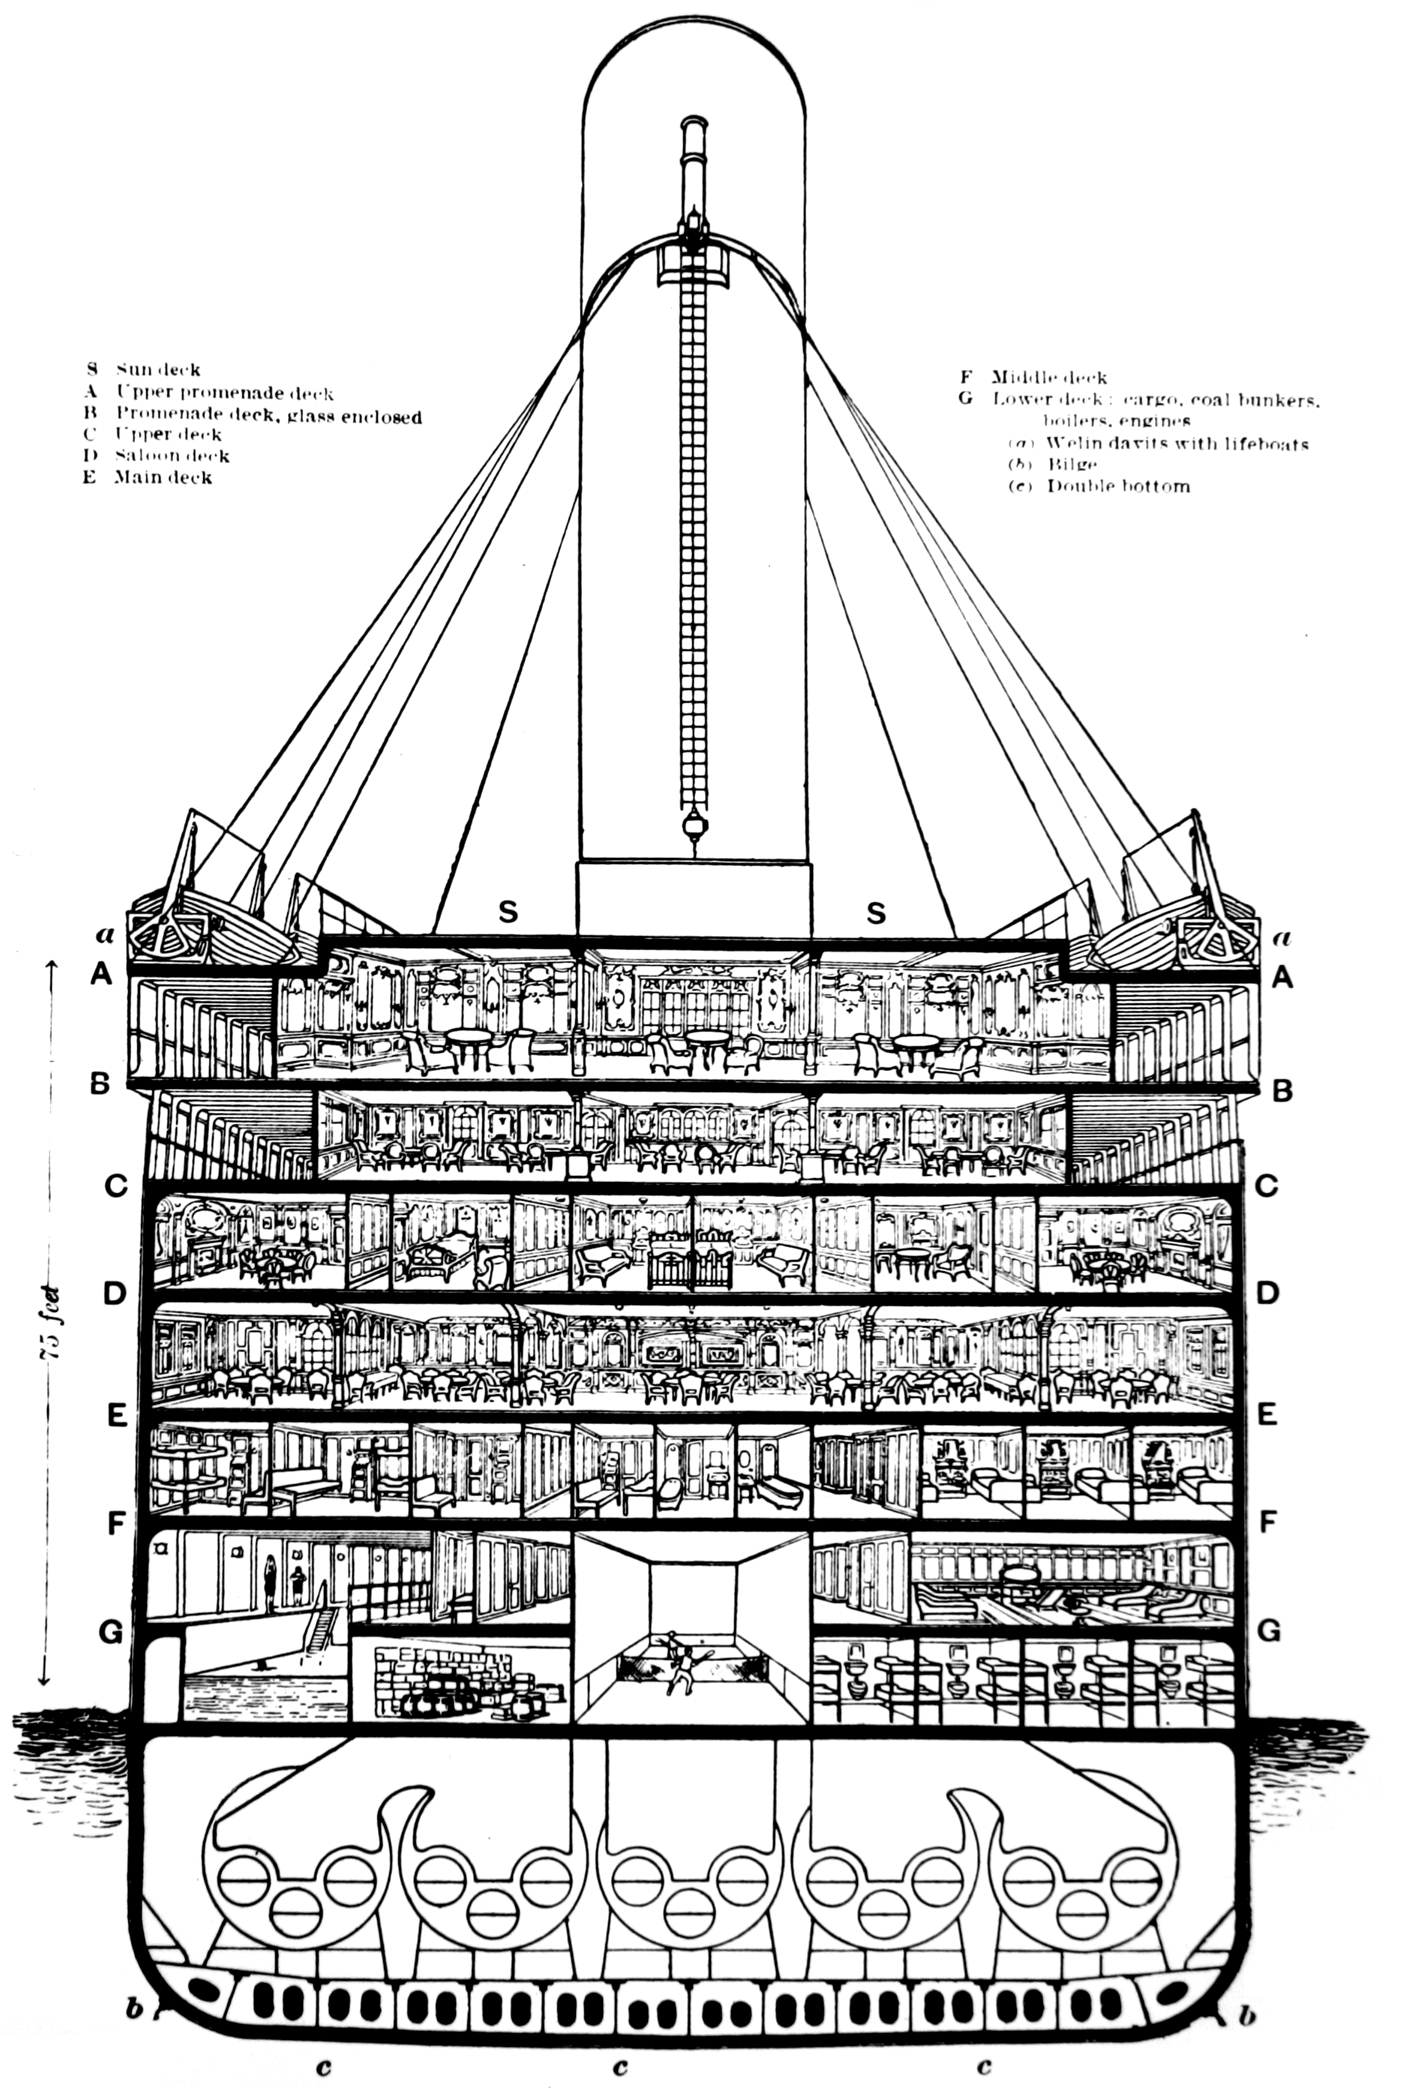

In [70]:
def show_floor(df):
    temp = []
    for i in df['Cabin'].unique():
        a = str(i)[0]
        if a not in temp:
            temp.append(a)
    return temp

show_floor(df)

['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F']

In [71]:
class CabinTransformer(BaseEstimator, TransformerMixin):
    def fit(self, df):
        return self
    
    def extract_cabin(self, cabin):
        cabin = str(cabin)
        if cabin=='nan':
            return 'U'
        else:
            return cabin[0]

    def group_deck(self, deck):
        if deck in ['A','B','C',]:
            return 'ABC'  # Os 3 andares mais altos
        elif deck in ['D','E']:
            return 'DE'  # Os próximos 2 andares
        elif deck in ['F','G']:
            return 'FG'  # Os 2 andares mais baixos
        else:
            return 'U'
        
    def transform(self, df):
        df_cabin = df.copy()
        df_cabin['Cabin'] = df_cabin['Cabin'].apply(self.extract_cabin)
        df_cabin['Cabin'] = df_cabin['Cabin'].apply(self.group_deck)
        
        cabin_maps = {'ABC':0, 'DE':1, 'FG':2, 'U':3}
        df_cabin['Cabin'] = df_cabin['Cabin'].map(cabin_maps)
        return df_cabin

In [72]:
CabinTransformer().fit_transform(df).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_group
0,False,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,3,S,2.0
1,True,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,0,C,3.0
2,True,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,3,S,3.0
3,True,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0,S,3.0
4,False,3.0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,3,S,3.0


In [73]:
sns.countplot(x='Cabin',hue = 'Survived', data=CabinTransformer().fit_transform(df))

<AxesSubplot:xlabel='Cabin', ylabel='count'>

In [74]:
df_3class = df.loc[(df['Pclass'] == 3) & (df['Cabin'].isnull())]

df_3class

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_group
0,False,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,2.0
2,True,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,3.0
4,False,3.0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,3.0
5,False,3.0,"Moran, Mr. James",male,25.0,0,0,8.4583,NaN,Q,3.0
7,False,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...
882,False,3.0,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,10.5167,NaN,S,2.0
884,False,3.0,"Sutehall, Mr. Henry Jr",male,25.0,0,0,7.0500,NaN,S,3.0
885,False,3.0,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,NaN,Q,3.0
888,False,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,23.4500,NaN,S,2.0


Como verificado no início da análise, a varíavel 'Cabin' possui menos de um terço de respostas em relação ao número total de registro do dataset. Entretanto, ao cruzar a informação com a variável 'Pclass', foi possível identificar que 479 passageiros de um total 688 passageiros sem informação de cabine, eram passageiros de terceira classe e que, portanto, possuiam acomodações nos andares F e G, baseado no estudo das informações históricas.



### Utilizando honorífico como agrupamento


In [75]:
honorificos = []
for name in df['Name']:
    a = name.split(', ')[1].split('.')[0]
    if a not in honorificos:
        honorificos.append(a)
print('Honoríficos dos passageiros:\n', honorificos)

Honoríficos dos passageiros:
 ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']


In [76]:
class CustomAttributeTitle(BaseEstimator, TransformerMixin):
  def fit(self, df):
    return self

  def title(self, name):
    return name.split(', ')[1].split('.')[0]

  def group (self, title):
    if title in ['Miss', 'Mlle', 'Ms']:
      return 'Miss' 

    if title in ['Mrs', 'Mme']:
      return 'Mrs'

    if title in ['Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']:
      return 'Rare'

    else:
      return title

  def transform(self, df):
    df_honorifico = df.copy()
    df_honorifico['Title'] = df_honorifico['Name'].apply(self.title)
    df_honorifico['Title'] = df_honorifico['Title'].apply(self.group)

    grupo_honorifico = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master", "Rare": "Rare"}
    df_honorifico['Title'] = df_honorifico['Title'].map(grupo_honorifico)
    df_honorifico['Title'] = df_honorifico['Title'].fillna(0)
    df_honorifico = df_honorifico.drop('Name', axis=1)

    return df_honorifico

In [77]:
CustomAttributeTitle().fit_transform(df).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_group,Title
0,False,3.0,male,22.0,1,0,7.2500,NaN,S,2.0,Mr
1,True,1.0,female,38.0,1,0,71.2833,C85,C,3.0,Mrs
2,True,3.0,female,26.0,0,0,7.9250,NaN,S,3.0,Miss
3,True,1.0,female,35.0,1,0,53.1000,C123,S,3.0,Mrs
4,False,3.0,male,35.0,0,0,8.0500,NaN,S,3.0,Mr


In [78]:
sns.countplot(x='Title',hue = 'Survived', data=CustomAttributeTitle().fit_transform(df))

<AxesSubplot:xlabel='Title', ylabel='count'>


Será considerado criança qualquer pessoa com 15 anos ou menos de idade.

### Cabin derivado em andar do navio.

A letra em frente à cabine do navio informa qual o andar que aquela cabine se encontra. Há cabines que possuem mais de uma letra, sendo interpretadas como mezaninos, tendo seu andar considerado como o mais baixo, já que normalmente as portas se encontram no andar inferior.

In [79]:
floor = []
for cabin in df['Cabin']:
    if pd.isna(cabin):
        floor.append(np.nan)  
    elif 'G' in cabin:
        floor.append(7)
    elif 'F' in cabin:
        floor.append(6)
    elif 'E' in cabin:
        floor.append(5)
    elif 'D' in cabin:
        floor.append(4)
    elif 'C' in cabin:
        floor.append(3)
    elif 'B' in cabin:
        floor.append(2)
    elif 'A' in cabin:
        floor.append(1)
    elif 'S' in cabin:
        floor.append(1)
    else:
        floor.append(np.nan)    

In [80]:
df['floor']=floor

### Cabin derivado em andar do navio.

A letra em frente à cabine do navio informa qual o andar que aquela cabine se encontra. Há cabines que possuem mais de uma letra, sendo interpretadas como mezaninos, tendo seu andar considerado como o mais baixo, já que normalmente as portas se encontram no andar inferior.

In [81]:
floor = []
for cabin in df['Cabin']:
    if pd.isna(cabin):
        floor.append(np.nan)  
    elif 'G' in cabin:
        floor.append(7)
    elif 'F' in cabin:
        floor.append(6)
    elif 'E' in cabin:
        floor.append(5)
    elif 'D' in cabin:
        floor.append(4)
    elif 'C' in cabin:
        floor.append(3)
    elif 'B' in cabin:
        floor.append(2)
    elif 'A' in cabin:
        floor.append(1)
    elif 'S' in cabin:
        floor.append(1)
    else:
        floor.append(np.nan)    

In [82]:
df['floor']=floor

In [83]:
df['isChild'] =df['Age']<=15

In [84]:
df['isChild'].value_counts()

False    804
True      87
Name: isChild, dtype: int64

## Reanálise

### Analise Multivariada

#### 1. Pclass

#####2. Name

tipo da variável - nominal 

É a string que representa o nome do passageiro do navio

Input esperado: uma entrada unica tipo OBJECT para cada linha

Problemas identificados:
* 0 Entradas nulas
* 0 Entradas duplicadas

* essa é uma coluna completamente irrelevante para um contexto de predição de taxa de sobrevivencia, poderia receber algum tratamento mas para esse estudo ela foi desconsiderada. 

In [85]:
desbribeColumn(df, 3)

Coluna Sex: 

Número de entradas nulas: 0


Dados estatísticos: 

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


Sex
male      577
female    314
Name: Sex, dtype: int64


#####3. Sex

tipo da variável - Categorica

Define o genero cujo passageiro se identifica

Input esperado: classificações de genero impostas pelo formulário

Problemas identificados:
* 0 Entradas nulas
* 0 Entradas duplicadas
* 0 Entradas conflitantes

A coluna em específico não requer tratamento


In [86]:
desbribeColumn(df,4)

Coluna Age: 

Número de entradas nulas: 0


Dados estatísticos: 

count    891.000000
mean      29.015903
std       13.411587
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


Age
25.00    113
21.50     42
40.00     34
30.00     34
24.00     30
        ... 
20.50      1
14.50      1
12.00      1
0.92       1
80.00      1
Name: Age, Length: 90, dtype: int64


####4. Age vs Survived

In [87]:
plt.hist(df['Age'], bins=5)[1]

array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ])

In [88]:
def Ageband(df):
  df_age = df.copy()
  df_age['Ageband'] = pd.cut(df_age['Age'], 5)
  return df_age[['Ageband', 'Survived']].groupby(['Ageband'], as_index=False).mean().sort_values(by='Ageband', ascending=True)

Ageband(df)

,Ageband,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.335378
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


####4. Age vs Fare based on Sex

In [89]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Age',y='Fare',data=df,hue='Sex')
plt.title('Relação entre Taxa e Idade baseado no Sexo')
plt.show()

####5. SibSp & Parch vs Survived




In [90]:
class CustomAttributes(BaseEstimator, TransformerMixin):
    def fit(self, df):
        return self
    
    def transform(self, df):
        df_family = df.copy()
        df_family['FamilySize'] = df_family['SibSp'] + df_family['Parch']
        df_family = df_family.drop(['SibSp','Parch'], axis=1)
        
        df_family['IsAlone'] = 0
        df_family.loc[df_family['FamilySize'] == 1, 'IsAlone'] = 1
        # df_family = df_family.drop('FamilySize', axis=1)
        
        df_family['Age*Class'] = df_family.Age * df_family.Pclass
        
        return df_family

#### Analise de variáveis numéricas

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    bool    
 1   Pclass     891 non-null    float64 
 2   Name       891 non-null    object  
 3   Sex        891 non-null    category
 4   Age        891 non-null    float64 
 5   SibSp      891 non-null    int64   
 6   Parch      891 non-null    int64   
 7   Fare       891 non-null    float64 
 8   Cabin      203 non-null    object  
 9   Embarked   889 non-null    category
 10  Age_group  891 non-null    float64 
 11  floor      203 non-null    float64 
 12  isChild    891 non-null    bool    
dtypes: bool(2), category(2), float64(5), int64(2), object(2)
memory usage: 66.5+ KB


In [92]:
df1 = df.select_dtypes([np.int, np.float])
columns = df1.columns
df1["Survived"] = df["Survived"].astype("category")
numeric_variables_graphs_per_survived =  {}
plt.figure(figsize=(80, 60), dpi=80)
for i, column in enumerate(columns):
    fig, ax = plt.subplots(1,2,figsize=(18, 6))
    sns.histplot(ax=ax[0],data=df1, x=column, hue='Survived',hue_order=[True,False],shrink=.8,multiple="dodge",bins=30,color='red',kde=True).set(title = "Histplot of " + column)
    sns.boxplot(data=df1,x=column, y='Survived',hue='Survived',hue_order=[True,False])  
    numeric_variables_graphs_per_survived[column] = fig

<ipython-input-92-7f881a49a1f9>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1 = df.select_dtypes([np.int, np.float])
<ipython-input-92-7f881a49a1f9>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1 = df.select_d

In [93]:
# numeric_variables_graphs["PassengerId"] # coluna dropada

PassengerId como esperado não tras nem uma valor ao dataset já que todos os valores são unicos, isso pode ser visto na distribuição uniforme entra 900 e 1300

In [94]:
df1 = df[['floor','isChild','Age_group']]
columns = df1.columns
df1["Survived"] = df["Survived"].astype("category")
category_variables_tables_per_survived =  {}
plt.figure(figsize=(80, 60), dpi=80)
for i, column in enumerate(columns):
    grouped = df.groupby([column])['Survived'].value_counts()
    percentages = (grouped / grouped.groupby(level=0).sum()) * 100
    category_variables_tables_per_survived[column] = percentages.to_frame()

<ipython-input-94-4cea51fc74ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Survived"] = df["Survived"].astype("category")


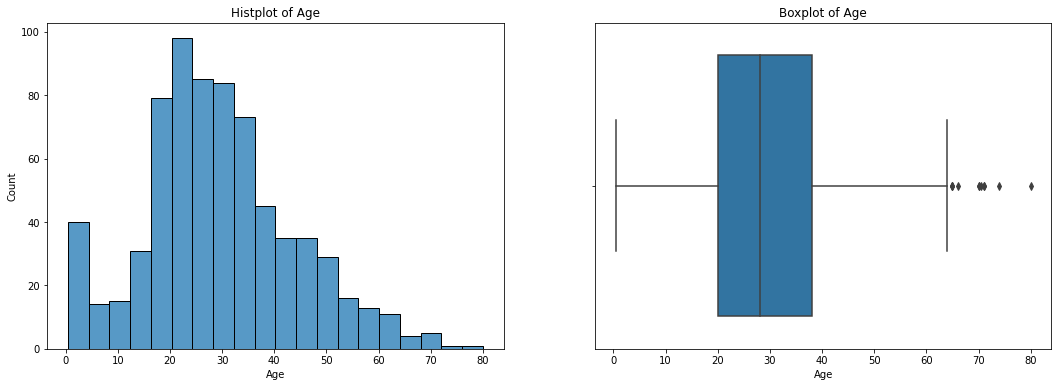

In [95]:
numeric_variables_graphs["Age"]

A variavel se comporta como uma distribuição normal, com o pico entre 20 e 30 anos. Isso nos permite usar metodos estatisticos que dependem de uma distribuição normal. Há um desbalanceamento para direita

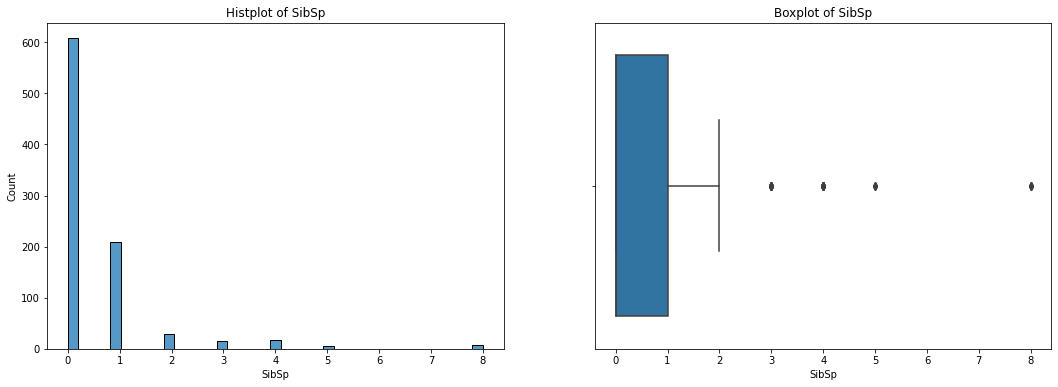

In [96]:
numeric_variables_graphs["SibSp"]

A não segue uma distribuição normal, conta com a presença de alguns outliers que a principio não parecem ser dados falsos, apenas um desvio do padrão.

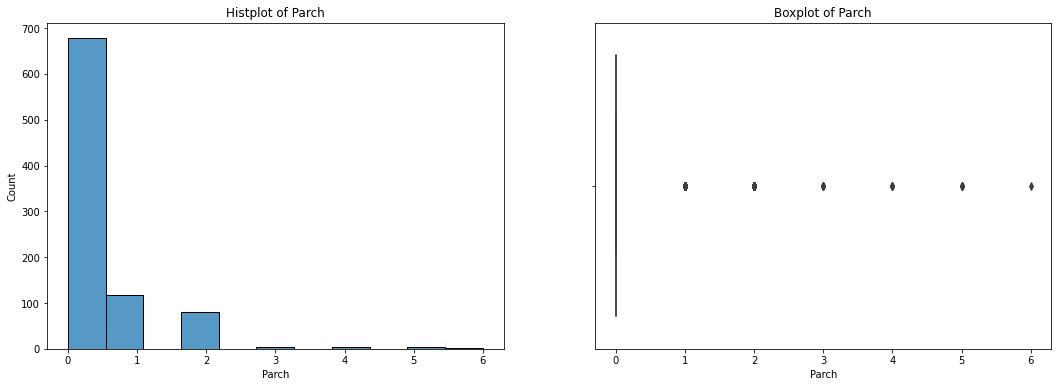

In [97]:
numeric_variables_graphs["Parch"]

A maioria dos reipulantes possuem pais ou fihos  igual a 0, o que pode indicar valores não informados e sendo preenchidos com 0, talvez possa ser criada um atribuito binario para identificação de presença ou não de pai ou filho.

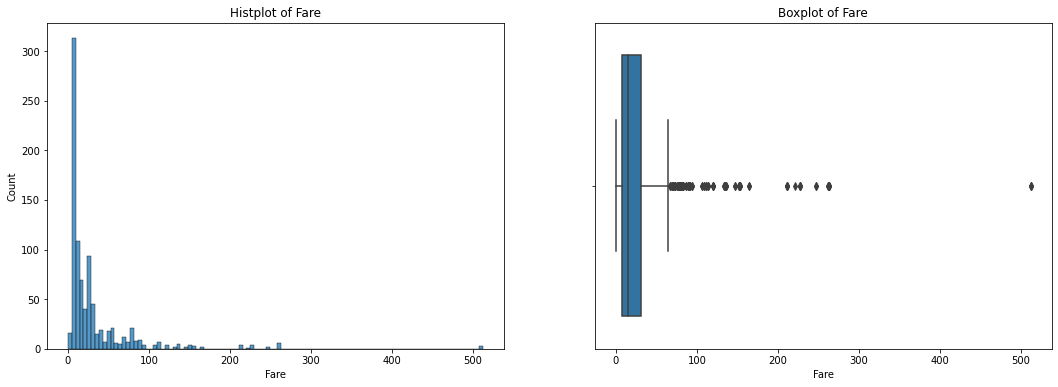

In [98]:
numeric_variables_graphs["Fare"]

Há uma pequena porcentagem de poessoas que não pagaram a passagem, acreditamos que sejam funcionarios do navio ou crianças. Há muitos outliers mas ainda não é possivel inferir se são valores falsos, é preciso entender a lógica do pagamento. 

#### Análise de variáveis continuas

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    bool    
 1   Pclass     891 non-null    float64 
 2   Name       891 non-null    object  
 3   Sex        891 non-null    category
 4   Age        891 non-null    float64 
 5   SibSp      891 non-null    int64   
 6   Parch      891 non-null    int64   
 7   Fare       891 non-null    float64 
 8   Cabin      203 non-null    object  
 9   Embarked   889 non-null    category
 10  Age_group  891 non-null    float64 
 11  floor      203 non-null    float64 
 12  isChild    891 non-null    bool    
dtypes: bool(2), category(2), float64(5), int64(2), object(2)
memory usage: 66.5+ KB


In [100]:
(df.Pclass.value_counts()/len(df)*100).to_frame()

,Pclass
3.0,55.106622
1.0,24.242424
2.0,20.650954


A maior parte das pessoas estão concentradas no grupo 3 que representa a classe econômica mais baixa.

In [101]:
(df.Sex.value_counts()/len(df)*100).to_frame()

,Sex
male,64.758698
female,35.241302


Há um desbalanceamento significativo para homens no dataset

In [102]:
(df.Embarked.value_counts()/len(df)*100).to_frame()

,Embarked
S,72.278339
C,18.855219
Q,8.641975


Este atributo permite visualizar que a quantidade de embarques foi descrescendo ao longo do trajeto.

### Analise Multivariada

Como o foco de nossa análise é indentificar padrões com o target (coluna survived), a análise multivariada será muito mais focada nessa variável específica.

In [103]:
df1 = df[['floor','Age_group','Pclass']]
columns = df1.columns
df1["Survived"] = df["Survived"].astype("category")
category_variables_graphs_per_survived =  {}
plt.figure(figsize=(80, 60), dpi=80)
for i, column in enumerate(columns):
    fig, ax = plt.subplots(1,1,figsize=(9, 6))
    sns.histplot(data=df1, x=column, hue='Survived',hue_order=[True,False],shrink=.8,multiple="dodge",bins=30,color='red',kde=True).set(title = "Histplot of " + column)
    category_variables_graphs_per_survived[column] = fig

<ipython-input-103-ffc6c1ae7981>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Survived"] = df["Survived"].astype("category")


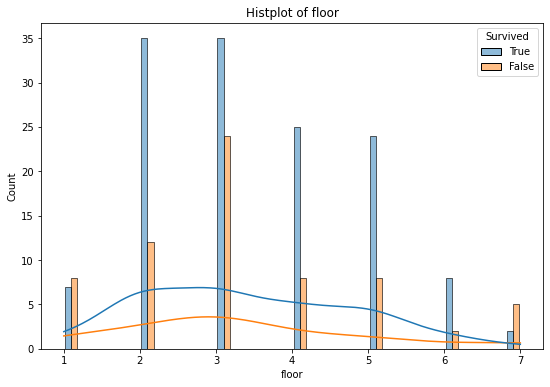

In [104]:
category_variables_graphs_per_survived['floor']

In [105]:

category_variables_tables_per_survived['Age_group']


Survived
Age_group Survived            
0.0       True      100.000000
1.0       True       53.333333
          False      46.666667
2.0       False      59.504132
          True       40.495868
3.0       False      65.929204
          True       34.070796
4.0       False      59.615385
          True       40.384615
5.0       False      90.909091
          True        9.090909

Podemos ver que a variavel suvived tem algum tipo de correlção com os andares do navio, representados pela variavel "floor". Passageiros dos andares 2 a 6 tiveram mais pessoas que sobreviveram, sendo o andar 6 o que obteve maior porcentagem de sobreviventes.

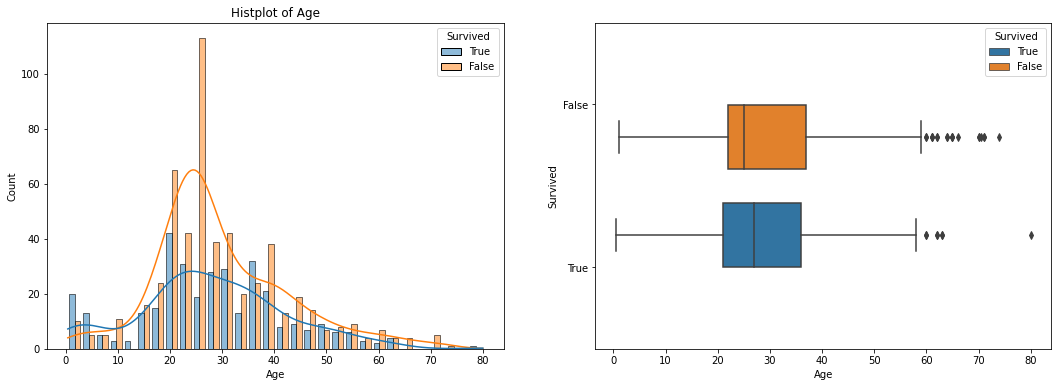

In [106]:
numeric_variables_graphs_per_survived["Age"]


Ao verificar a relação de sobreviventes por idade podemos ver que a media da idade de pessoas que sobreviveram é menor que a de pessoas que não sobreviveram,.Também é possivel observar que os idosos representados por outliers se fazem mais presentes no grupo de sobreviventes que no grupo dos não sobreviventes.
Já olhando o grupo dos não sobreviventes podemos afirmar que a maioria das pessoas que o compõe tem entre 20 e 30 anos.

In [107]:
df1 = df[['floor','isChild']]
columns = df1.columns
df1["Survived"] = df["Survived"].astype("category")
category_variables_tables_per_survived =  {}
plt.figure(figsize=(80, 60), dpi=80)
for i, column in enumerate(columns):
    grouped = df.groupby([column])['Survived'].value_counts()
    percentages = (grouped / grouped.groupby(level=0).sum()) * 100
    category_variables_tables_per_survived[column] = percentages.to_frame()

<ipython-input-107-5e08a71302b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Survived"] = df["Survived"].astype("category")


In [108]:
category_variables_tables_per_survived['isChild']


Survived
isChild Survived          
False   False     63.80597
        True      36.19403
True    True      58.62069
        False     41.37931

In [109]:
df1 = df[['floor','Age_group']]
columns = df1.columns
df1["Survived"] = df["Survived"].astype("category")
category_variables_tables_per_survived =  {}
plt.figure(figsize=(80, 60), dpi=80)
for i, column in enumerate(columns):
    grouped = df.groupby([column])['Survived'].value_counts()
    percentages = (grouped / grouped.groupby(level=0).sum()) * 100
    category_variables_tables_per_survived[column] = percentages.to_frame()

<ipython-input-109-ff42d2993287>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Survived"] = df["Survived"].astype("category")


In [110]:
category_variables_tables_per_survived['Age_group']

Survived
Age_group Survived            
0.0       True      100.000000
1.0       True       53.333333
          False      46.666667
2.0       False      59.504132
          True       40.495868
3.0       False      65.929204
          True       34.070796
4.0       False      59.615385
          True       40.384615
5.0       False      90.909091
          True        9.090909

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    bool    
 1   Pclass     891 non-null    float64 
 2   Name       891 non-null    object  
 3   Sex        891 non-null    category
 4   Age        891 non-null    float64 
 5   SibSp      891 non-null    int64   
 6   Parch      891 non-null    int64   
 7   Fare       891 non-null    float64 
 8   Cabin      203 non-null    object  
 9   Embarked   889 non-null    category
 10  Age_group  891 non-null    float64 
 11  floor      203 non-null    float64 
 12  isChild    891 non-null    bool    
dtypes: bool(2), category(2), float64(5), int64(2), object(2)
memory usage: 66.5+ KB


In [112]:
# df['SibSp'] > 0 or df['Parch']>0

In [113]:


df['hasLateralFamily'] = df['SibSp']>0
df['hasVerticalFamily'] = df['Parch']>0




In [114]:
corr_df = df.corr(method='pearson')

In [115]:
plt.matshow(corr_df)
plt.show()

In [116]:
print(corr_df, "\n")

                   Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived           1.000000 -0.338481 -0.060823 -0.035322  0.081629  0.257307   
Pclass            -0.338481  1.000000 -0.416236  0.083081  0.018443 -0.549500   
Age               -0.060823 -0.416236  1.000000 -0.265674 -0.181886  0.121832   
SibSp             -0.035322  0.083081 -0.265674  1.000000  0.414838  0.159651   
Parch              0.081629  0.018443 -0.181886  0.414838  1.000000  0.216225   
Fare               0.257307 -0.549500  0.121832  0.159651  0.216225  1.000000   
Age_group         -0.120181 -0.314202  0.912656 -0.297919 -0.259665  0.058381   
floor              0.026639  0.640379 -0.209667  0.039516  0.026622 -0.300393   
isChild            0.136884  0.131894 -0.559007  0.382516  0.360462  0.003423   
hasLateralFamily   0.115867 -0.076009 -0.158286  0.695562  0.356133  0.192190   
hasVerticalFamily  0.147408 -0.027526 -0.265955  0.462241  0.845092  0.237717   

                   Age_grou

# Conclusão

Após analise podemos inferir que:
* Passageiros do sexo feminono possuiram mais sucesso em sobreviver ao acidente
* Passageiros de menos de 1 ano de idade tiveram 100% de sobrevivencia
* Passageiros sem familiares a bordos (filhos/pais ou conjujes) tiveram menor chance de sobrevivencia
* Pessoas com maior classe (pClass) possuiram maior chance de sobrevivencia

In [117]:
df = df.drop(columns=['floor', 'isChild'] )

In [118]:
def cleanUp(df):
  df["Age_group"] = 0
  df.loc[(df["Age"]<1),"Age_group"] = 0
  df.loc[(df["Age"]<15) & (df["Age"]>=1),"Age_group"] = 1 #isChild
  df.loc[(df["Age"]>=15) & (df["Age"]<25), "Age_group"] = 2
  df.loc[(df["Age"]>=25) & (df["Age"]<45), "Age_group"] = 3
  df.loc[(df["Age"]>=45) & (df["Age"]<65), "Age_group"] = 4
  df.loc[df["Age"]>=65, "Age_group"] = 5
  
  df['hasLateralFamily'] = df['SibSp']>0
  df['hasVerticalFamily'] = df['Parch']>0
  df = df.drop('Ticket', axis=1)

  df = df.drop(columns=['Name', 'Cabin'] )
  df = df.drop(columns=['SibSp','Parch'] )
  df = df.fillna(1)
  df["Sex"] = df["Sex"].replace(to_replace='male', value=1)
  df["Sex"] = df["Sex"].replace(to_replace='female', value=2)
  df["Embarked"] = df["Embarked"].replace(to_replace="S", value=1)
  df["Embarked"] = df["Embarked"].replace(to_replace="C", value=2)
  df["Embarked"] = df["Embarked"].replace(to_replace="Q", value=3)
  return df

In [119]:
df = df.drop(columns=['Name', 'Cabin'] )



In [120]:
df = df.drop(columns=['SibSp','Parch'] )


In [121]:
df = df.dropna()

In [122]:
df.isna().sum()

Survived             0
Pclass               0
Sex                  0
Age                  0
Fare                 0
Embarked             0
Age_group            0
hasLateralFamily     0
hasVerticalFamily    0
dtype: int64

In [123]:
df["Sex"] = df["Sex"].replace(to_replace='male', value=1)
df["Sex"] = df["Sex"].replace(to_replace='female', value=2)

In [124]:
df["Embarked"] = df["Embarked"].replace(to_replace="S", value=1)
df["Embarked"] = df["Embarked"].replace(to_replace="C", value=2)
df["Embarked"] = df["Embarked"].replace(to_replace="Q", value=3)

In [125]:
X = df.drop(columns='Survived')
y = df.Survived

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [127]:
dtc = RandomForestClassifier()
dtc.fit(X_train, y_train)

RandomForestClassifier()

In [128]:
a = cleanUp(df_test)
b = a.drop(columns='PassengerId')
resultado_dtc = dtc.predict(b)

In [140]:
a

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Age_group,hasLateralFamily,hasVerticalFamily
0,892,3,1,34.5,7.8292,3,3,False,False
1,893,3,2,47.0,7.0000,1,4,True,False
2,894,2,1,62.0,9.6875,3,4,False,False
3,895,3,1,27.0,8.6625,1,3,False,False
4,896,3,2,22.0,12.2875,1,2,True,True
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1.0,8.0500,1,0,False,False
414,1306,1,2,39.0,108.9000,2,3,False,False
415,1307,3,1,38.5,7.2500,1,3,False,False
416,1308,3,1,1.0,8.0500,1,0,False,False


In [129]:
resultado_dtc

array([False, False, False, False,  True, False, False, False,  True,
       False,  True, False,  True, False,  True,  True, False, False,
       False, False,  True,  True,  True, False,  True, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False, False,  True, False,  True, False,  True,  True,
       False, False,  True,  True, False, False, False,  True,  True,
        True, False, False, False,  True,  True, False,  True, False,
        True,  True,  True,  True, False, False,  True,  True, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False,  True, False,  True, False, False,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,

In [130]:
# resultado_dtc = resultado_dtc.replace("False", value=0)
# resultado_dtc = resultado_dtc.replace("True", value=1)
for i in range(len(resultado_dtc)):
  
    # replace hardik with shardul
    if resultado_dtc[i] == 'False':
        resultado_dtc[i] = '0'
  
    # replace pant with ishan
    if resultado_dtc[i] == 'True':
        resultado_dtc[i] = '1'

            # replace hardik with shardul
    if resultado_dtc[i] == False:
        resultado_dtc[i] = '0'
  
    # replace pant with ishan
    if resultado_dtc[i] == True:
        resultado_dtc[i] = '1'
  

In [131]:
resultado35 = pd.Series(resultado_dtc)

In [132]:
resultado35

0      True
1      True
2      True
3      True
4      True
       ... 
413    True
414    True
415    True
416    True
417    True
Length: 418, dtype: bool

In [133]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,hasLateralFamily,hasVerticalFamily
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3,False,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,4,True,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,4,False,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,3,False,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,False,False
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3,False,False
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,3,False,False
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,False,False


In [134]:
resultado35 = resultado35.reset_index()

In [135]:
resultado35["Survived"] = resultado_dtc

In [136]:
resultado35

,index,0,Survived
0,0,True,True
1,1,True,True
2,2,True,True
3,3,True,True
4,4,True,True
...,...,...,...
413,413,True,True
414,414,True,True
415,415,True,True
416,416,True,True


In [137]:
resultado35["index"] = df_test["PassengerId"]

In [138]:
resultado35

,index,0,Survived
0,892,True,True
1,893,True,True
2,894,True,True
3,895,True,True
4,896,True,True
...,...,...,...
413,1305,True,True
414,1306,True,True
415,1307,True,True
416,1308,True,True


In [139]:
resultado35[["PassengerId", "Survived"]] = resultado35

ValueError: ignored

In [ ]:
resultado35.drop(columns=["PassengerId"], inplace=True)

In [ ]:
resultado35.to_csv?

In [ ]:
resultado35.index = resultado35["PassengerId"]

In [ ]:
resultado35

In [ ]:
resultado35.to_csv("resultado36.csv", index_label="PassengerId")

In [ ]:
resultado35

In [ ]:
resultado35["Survived"] = resultado35["Survived"].apply(lambda x: 1 if x == True else 0)

In [ ]:
pd.Series(resultado35["Survived"]).to_csv("resultado37.csv", index=True)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": resultado35.index,
        "Survived": resultado35['Survived']
    })
submission.to_csv('submission.csv', index=False)


In [ ]:
resultado35